In [4109]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

Loading the Data

In [4110]:
dtest = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
df.head(10)

combine = [df, dtest]

In [4111]:
dtest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4112]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Understanding the Data


In [4113]:
df.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [4114]:
df.groupby(['Sex'],as_index=False)['Survived'].mean()



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [4115]:
df.groupby(['SibSp'],as_index=False)['Survived'].mean()


,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [4116]:
df.groupby(['Parch'],as_index=False)['Survived'].mean()


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [4117]:
df.Embarked.unique()
df.Embarked.isnull().sum()

c:\Users\rafaa\Desktop\Data\virtual\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


2

In [4118]:
df['FamilySize'] = df['SibSp'] + df['Parch']
# df.groupby(['FamilySize'],as_index=False)['Survived'].mean()
dtest['FamilySize'] = dtest['SibSp'] + dtest['Parch']
dtest['FamilySize'] = dtest['FamilySize'].apply(lambda x: 'Alone' if x == 0  else ('Small' if x > 0 and x <= 2 else ('medium' if x > 2 and x <= 4 else 'large')))

df['FamilySize'] = df['FamilySize'].apply(lambda x: 'Alone' if x == 0  else ('Small' if x > 0 and x <= 2 else ('medium' if x > 2 and x <= 4 else 'large')))
df.drop('SibSp', axis= 1,inplace=True)
df.drop('Parch', axis= 1,inplace=True)

dtest.drop('SibSp', axis= 1,inplace=True)
dtest.drop('Parch', axis= 1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,Alone


In [4119]:
df.FamilySize.unique()

array(['Small', 'Alone', 'medium', 'large'], dtype=object)

In [4120]:
df['FamilySize'] = df['FamilySize'].map( {'Alone': 0, 'Small': 1, 'medium': 2, 'large':3} ).astype(int)
dtest['FamilySize'] = dtest['FamilySize'].map( {'Alone': 0, 'Small': 1, 'medium': 2, 'large':3} ).astype(int)

Handling Data, Missing Values, Normalizing, Scaling

In [4121]:
df.info()
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  FamilySize   891 non-null    int32  
dtypes: float64(2), int32(1), int64(3), object(5)
memory usage: 73.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2 

In [4122]:
null_values = df.isnull().sum()
null_values



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [4123]:
null_values_test = dtest.isnull().sum()
null_values_test

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [4124]:
total_cells = np.product(df.shape)
total_missing = null_values.sum()
percent_missing = (total_missing/total_cells) * 100
print("Percentage of total data",percent_missing)

percentage_null_age = (df['Age'].isnull().sum()/df['Age'].shape[0]) *100
percentage_null_cabin = (df['Cabin'].isnull().sum()/df['Cabin'].shape[0]) *100

#df['Fare']=df['Fare'].fillna(method='bfill', axis=0).fillna(0)

print("Percentage Age: %",percentage_null_age,"Percentage Cabin: %",percentage_null_cabin)


Percentage of total data 8.835833078257322
Percentage Age: % 19.865319865319865 Percentage Cabin: % 77.10437710437711


- 8% of the data is missing, this is few data
- 19% of the Age data is missing, which for this I will use the average age
- 77% of the cabin data is missing, which for this I will probably drop the column due to >50% of data is missing

## Data Dropping
- In theory, port of embarcation. b/c this variables will not influence the outcome
- IDK if Sibs/Parch is relevant in this case.
- Passanger ID doesnt tells me anything about data

In [4125]:
# df.drop('Embarked', axis= 1, inplace=True)
df.drop('Cabin', axis= 1, inplace=True)
# df.drop('Name', axis= 1, inplace=True)
# df.drop('PassengerId', axis= 1, inplace=True)

# dtest.drop('Embarked', axis= 1, inplace=True)
dtest.drop('Cabin', axis= 1, inplace=True)
# dtest.drop('Name', axis= 1, inplace=True)
# dtest.drop('PassengerId', axis= 1, inplace=True)

In [4126]:
# df.Name.unique()

names = df['Name'].str.split(',', expand=True)
titles = names[1].str.split('.',expand=True)[0]
titles.unique()

names = dtest['Name'].str.split(',', expand=True)
titles = names[1].str.split('.',expand=True)[0]
titles.unique()



array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [4127]:
#Only Considering TItles
df['Name'] = df['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]
df['Name'] = df['Name'].str.strip()

df.head()

dtest['Name'] = dtest['Name'].str.split(',', expand=True)[1].str.split('.',expand=True)[0]


In [4128]:
# for dataset in combine:
#     dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# pd.crosstab(train_df['Title'], train_df['Sex'])
pd.crosstab(df['Name'], df['Sex'])

Sex,female,male
Name,,
Capt,0,1
Col,0,2
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40
Miss,182,0


In [4129]:
df['Name'] = df['Name'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})
df['Name'] = df['Name'].replace(['Lady','Capt','Col','Dr','Jonkheer','Major','Don','Rev','Sir','the Countess'],'Rare')
pd.crosstab(df['Name'], df['Sex'])

Sex,female,male
Name,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [4130]:
dtest.info()
df['Fare'].fillna(df['Fare'].median(), inplace=True)
dtest['Fare'].fillna(dtest['Fare'].median(), inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   FamilySize   418 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 27.9+ KB


In [4131]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


dtest['Age'].fillna(dtest['Age'].mean(), inplace=True)


dtest.info()

df['Embarked']=df['Embarked'].fillna(method='ffill')

dtest['Embarked'] = dtest['Embarked'].fillna(method='ffill')


C:\Users\rafaa\AppData\Local\Temp\ipykernel_70620\3036589986.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Embarked']=df['Embarked'].fillna(method='ffill')
C:\Users\rafaa\AppData\Local\Temp\ipykernel_70620\3036589986.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dtest['Embarked'] = dtest['Embarked'].fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   Ticket       418 non-null    object 
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
 8   FamilySize   418 non-null    int32  
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 27.9+ KB


In [4132]:
df.FamilySize.unique()

array([1, 0, 2, 3])

Converting Categorical Variables into Numerical


In [4133]:
#Sex is a binary (Male/Female)

OE=OrdinalEncoder()
HO = OneHotEncoder()

# data = df([['Sex']])

sex_data = np.array(df['Sex']).reshape(-1,1)
encoded = OE.fit_transform(sex_data)
df['Sex'] = encoded

sex_datatest = np.array(dtest['Sex']).reshape(-1,1)
encoded = OE.fit_transform(sex_datatest)
dtest['Sex'] = encoded


name_data = np.array(df['Name']).reshape(-1,1)
encoded = OE.fit_transform(name_data)
df['Name'] = encoded

name_datatest = np.array(dtest['Name']).reshape(-1,1)
encoded = OE.fit_transform(name_datatest)
dtest['Name'] = encoded

# family_data = np.array(df['FamilySize']).reshape(-1,1)
# encoded = OE.fit_transform(name_data)
# df['FamilySize'] = encoded

# family_datatest = np.array(dtest['FamilySize']).reshape(-1,1)
# encoded = OE.fit_transform(name_datatest)
# dtest['FamilySize'] = encoded

# name_data = np.array(df['Embarked']).reshape(-1,1)
# encoded = OE.fit_transform(name_data)
# df['Embarked'] = encoded

# name_datatest = np.array(dtest['Embarked']).reshape(-1,1)
# encoded = OE.fit_transform(name_datatest)
# dtest['Embarked'] = encoded


one_hot = pd.get_dummies(df['Embarked']).astype(int)
df = df.drop('Embarked',axis = 1)
df = df.join(one_hot)

one_hot_test = pd.get_dummies(dtest['Embarked']).astype(int)
dtest = dtest.drop('Embarked',axis = 1)
dtest = dtest.join(one_hot_test)

In [4134]:
# df.FamilySize.unique()
# array([2., 3., 1., 0., 4.]) cuando se utiliza el ordinal encoder y no entiendo porque da un valor adicional si manualmente solo existen 4 posibles valores

In [4135]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    float64
 4   Sex          891 non-null    float64
 5   Age          891 non-null    float64
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   FamilySize   891 non-null    int32  
 9   C            891 non-null    int32  
 10  Q            891 non-null    int32  
 11  S            891 non-null    int32  
dtypes: float64(4), int32(4), int64(3), object(1)
memory usage: 69.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,FamilySize,C,Q,S
0,1,0,3,2.0,1.0,22.000000,A/5 21171,7.2500,1,0,0,1
1,2,1,1,3.0,0.0,38.000000,PC 17599,71.2833,1,1,0,0
2,3,1,3,1.0,0.0,26.000000,STON/O2. 3101282,7.9250,0,0,0,1
3,4,1,1,3.0,0.0,35.000000,113803,53.1000,1,0,0,1
4,5,0,3,2.0,1.0,35.000000,373450,8.0500,0,0,0,1
5,6,0,3,2.0,1.0,29.699118,330877,8.4583,0,0,1,0
6,7,0,1,2.0,1.0,54.000000,17463,51.8625,0,0,0,1
7,8,0,3,0.0,1.0,2.000000,349909,21.0750,2,0,0,1
8,9,1,3,3.0,0.0,27.000000,347742,11.1333,1,0,0,1
9,10,1,2,3.0,0.0,14.000000,237736,30.0708,1,1,0,0


In [4136]:
df = df.drop(['PassengerId'], axis=1)



In [4137]:
df.head(),dtest.head()

(   Survived  Pclass  Name  Sex   Age            Ticket     Fare  FamilySize  \
 0         0       3   2.0  1.0  22.0         A/5 21171   7.2500           1   
 1         1       1   3.0  0.0  38.0          PC 17599  71.2833           1   
 2         1       3   1.0  0.0  26.0  STON/O2. 3101282   7.9250           0   
 3         1       1   3.0  0.0  35.0            113803  53.1000           1   
 4         0       3   2.0  1.0  35.0            373450   8.0500           0   
 
    C  Q  S  
 0  0  0  1  
 1  1  0  0  
 2  0  0  1  
 3  0  0  1  
 4  0  0  1  ,
    PassengerId  Pclass  Name  Sex   Age   Ticket     Fare  FamilySize  C  Q  S
 0          892       3   5.0  1.0  34.5   330911   7.8292           0  0  1  0
 1          893       3   6.0  0.0  47.0   363272   7.0000           1  0  0  1
 2          894       2   5.0  1.0  62.0   240276   9.6875           0  0  1  0
 3          895       3   5.0  1.0  27.0   315154   8.6625           0  0  0  1
 4          896       3   6.0  0.

In [4138]:
df.Ticket.unique()


array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [4139]:
#due to all tickets being unique values, there will be no relation between the ticket number and anything. So it will also be discarded
df.drop('Ticket', axis= 1, inplace=True)


dtest.drop('Ticket', axis= 1, inplace=True)
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    float64
 3   Sex          418 non-null    float64
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   FamilySize   418 non-null    int32  
 7   C            418 non-null    int32  
 8   Q            418 non-null    int32  
 9   S            418 non-null    int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 26.3 KB


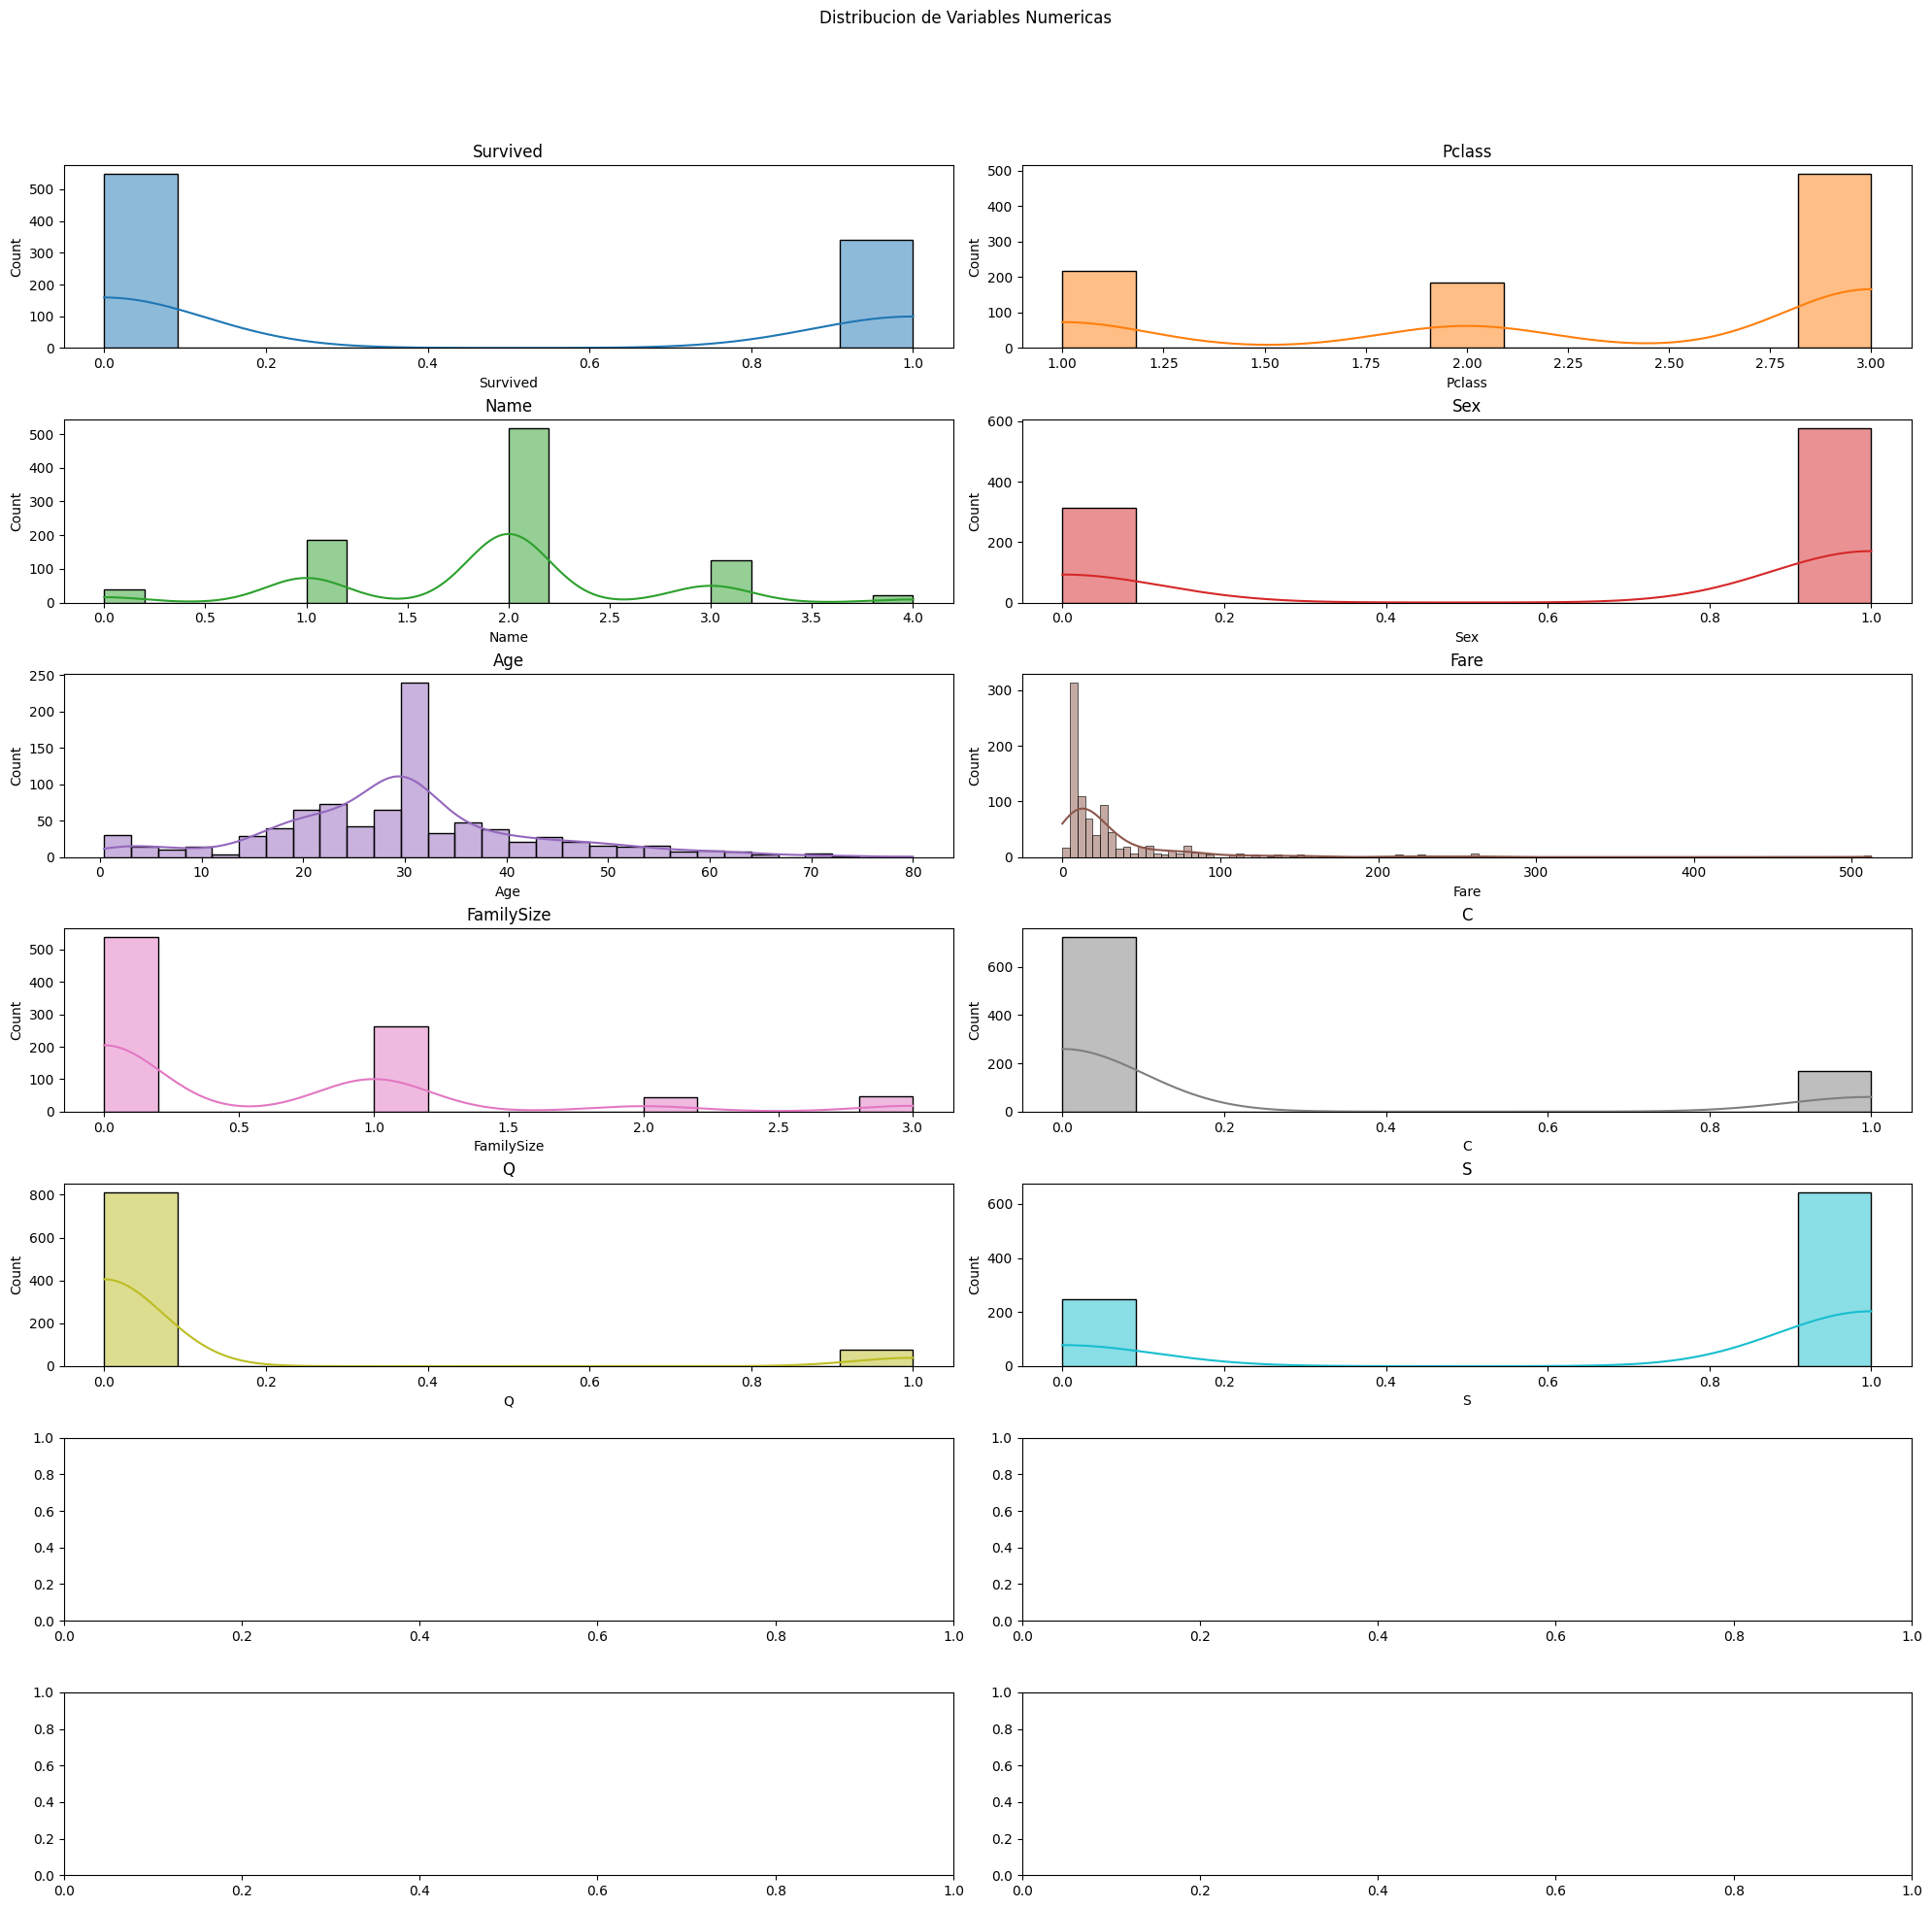

In [4140]:
#Now all variables are numerical
##Estadistica Univariada
##Histogramas de frecuencia para variables numericas
fig, ax = plt.subplots(7,2, figsize = (20,20))
ax = ax.flat
num_col = df.select_dtypes(include=['int64','float64','int32']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = df, x = col, kde = True, color = (list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'],ax = ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Distribucion de Variables Numericas')
plt.show()

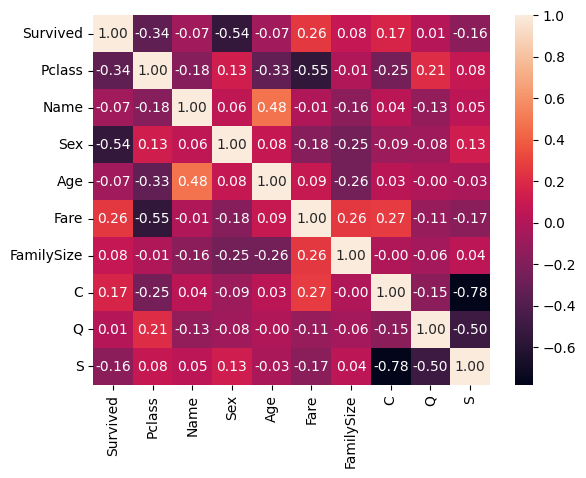

In [4141]:
sb.heatmap(data = df.corr(numeric_only= True), annot=True, fmt = '0.2f')
plt.show()

In [4142]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    float64
 3   Sex          418 non-null    float64
 4   Age          418 non-null    float64
 5   Fare         418 non-null    float64
 6   FamilySize   418 non-null    int32  
 7   C            418 non-null    int32  
 8   Q            418 non-null    int32  
 9   S            418 non-null    int32  
dtypes: float64(4), int32(4), int64(2)
memory usage: 26.3 KB


In [4143]:

df.columns, dtest.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'FamilySize', 'C',
        'Q', 'S'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'FamilySize',
        'C', 'Q', 'S'],
       dtype='object'))

# LOGISTIC REGRESSION
Declare Feature Vector And Target Variable


In [4144]:
# rspst = dtest[['Survived']].copy()

X = df.drop(['Survived'], axis=1)

y = df['Survived']

copyTest = dtest
dtest = dtest.drop("PassengerId",axis=1)

Split data into separate training and test set

In [4145]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Feature Scaling

In [4146]:
cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,Pclass,Name,Sex,Age,Fare,FamilySize,C,Q,S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.658708,0.466643,0.653090,0.366394,0.062192,0.184457,0.182584,0.091292,0.726124
std,0.416884,0.193132,0.476321,0.165000,0.097858,0.272157,0.386597,0.288227,0.446260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.250000,0.000000,0.268877,0.015454,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.500000,1.000000,0.365929,0.028217,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.500000,1.000000,0.432749,0.061045,0.333333,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Model Training

In [4147]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression, LinearRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

Predict Results

In [4148]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

Check Accuarcy score

In [4149]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7933


In [4150]:
df.shape, dtest.shape, df.columns, dtest.columns


((891, 10),
 (418, 9),
 Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare', 'FamilySize', 'C',
        'Q', 'S'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'Fare', 'FamilySize', 'C', 'Q', 'S'], dtype='object'))

In [4151]:
#Prediction
y_pred_test_1 = logreg.predict(dtest)
y_pred_test_1

c:\Users\rafaa\Desktop\Data\virtual\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [4152]:
submission = pd.DataFrame({
        "PassengerId": copyTest["PassengerId"],
        "Survived": y_pred_test_1
    })

submission.to_csv('gender_submission.csv', index=False)

In [4153]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
